In [1]:
from sklearn.datasets import load_boston
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
boston = load_boston()
X1 = boston.data
y = boston.target

In [3]:
X1 = sm.add_constant(X1)

In [4]:
features = list(boston.feature_names)

In [5]:
features.insert(0, "INTRCPT")

In [6]:
features

['INTRCPT',
 'CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

**Backward Feature Elimination**

In [7]:
# iterate from last to first feature and 
# eliminate features according to p values
for i in range(X1.shape[1], 0, -1):
    linear_model = sm.regression.linear_model.OLS(y, X1)
    fit = linear_model.fit()
    p_values = fit.pvalues
    # store the index of the max p_value
    max_place = np.where(p_values == max(p_values))[0][0]
    print("Features to be excluded:", features[max_place], 
          "p values are:", p_values[max_place])
    X1 = np.delete(X1, max_place, axis=-1)
    features.remove(features[max_place])

Features to be excluded: AGE p values are: 0.958229309205725
Features to be excluded: INDUS p values are: 0.7379887092915007
Features to be excluded: CHAS p values are: 0.001551469263911685
Features to be excluded: ZN p values are: 0.0008640500577762318
Features to be excluded: TAX p values are: 0.0019820858677808352
Features to be excluded: CRIM p values are: 0.0022519803872580275
Features to be excluded: RAD p values are: 0.015219695812946302
Features to be excluded: B p values are: 0.00038060429566672053
Features to be excluded: NOX p values are: 5.488148101823034e-08
Features to be excluded: DIS p values are: 1.6684670685099012e-05
Features to be excluded: INTRCPT p values are: 2.7258082620430965e-06
Features to be excluded: PTRATIO p values are: 1.0810607285552808e-09
Features to be excluded: LSTAT p values are: 4.811851673074096e-73
Features to be excluded: RM p values are: 3.743758187855038e-256


**Ridge Regularization**

In [8]:
X2 = boston.data
X2_train, X2_test, y_train, y_test = train_test_split(X2, y,
                                                     test_size = 0.3,
                                                     random_state = 3)

In [9]:
linear_regression = LinearRegression()
linear_regression.fit(X2_train, y_train)
linear_regression_train_r2 = linear_regression.score(X2_train, y_train)
linear_regression_test_r2 = linear_regression.score(X2_test, y_test)
print("Training r2 score", linear_regression_train_r2)
print("Test r2 score", linear_regression_test_r2)

Training r2 score 0.7419034960343789
Test r2 score 0.7147895265576858


In [10]:
ridge_model = Ridge(alpha = 0.01)
ridge_model.fit(X2_train, y_train)
ridge_model_train_r2 = ridge_model.score(X2_train, y_train)
ridge_model_test_r2 = ridge_model.score(X2_test, y_test)
print("Training r2 score", ridge_model_train_r2)
print("Test r2 score", ridge_model_test_r2)

Training r2 score 0.7419030253527293
Test r2 score 0.7146125373123906


In [11]:
ridge_model2 = Ridge(alpha = 100)
ridge_model2.fit(X2_train, y_train)
ridge_model2_train_r2 = ridge_model2.score(X2_train, y_train)
ridge_model2_test_r2 = ridge_model2.score(X2_test, y_test)
print("Training r2 score", ridge_model2_train_r2)
print("Test r2 score", ridge_model2_test_r2)

Training r2 score 0.7172809669938278
Test r2 score 0.6805765856921936


In [12]:
from sklearn.model_selection import GridSearchCV
# Create a range of trees to evaluate
alphas_grid = {'alpha': [0.001, 0.002, 0.1, 0.2, 0.5, 0.75, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 100]}

# define all parameters except n_estimators
ridge_search_model = Ridge()

# Grid Search Object using the trees range, the model and 5-fold cross validation
grid_search = GridSearchCV(estimator = ridge_search_model, param_grid=alphas_grid, 
                           cv = 5, scoring = 'r2', verbose = 1,
                           n_jobs = -1, return_train_score = True)

# fit the dataset to grid search object
grid_search.fit(X2, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.7s finished
/Users/cereniyim/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.002, 0.1, 0.2, 0.5, 0.75, 1, 2, 3,
                                   4, 5, 6, 7, 8, 9, 10, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

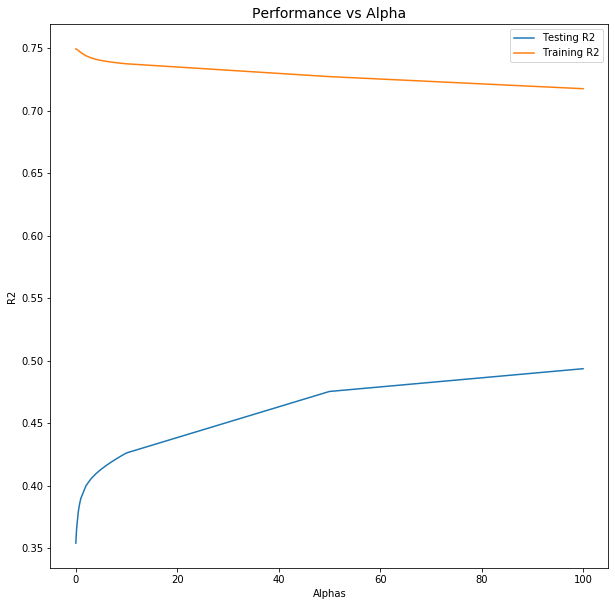

In [13]:
# Get the results into a dataframe
ridge_results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
plt.figure(figsize=(10,10))
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'], label = 'Testing R2')
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'], label = 'Training R2')

# set title, labels and legend
plt.xlabel('Alphas'); plt.ylabel('R2'); plt.legend();
plt.title('Performance vs Alpha', size=14);

In [15]:
ridge_results[["param_alpha", "params", "mean_test_score"]].sort_values(by="mean_test_score", ascending=False)

,param_alpha,params,mean_test_score
17,100,{'alpha': 100},0.493443
16,50,{'alpha': 50},0.475231
15,10,{'alpha': 10},0.426071
14,9,{'alpha': 9},0.423777
13,8,{'alpha': 8},0.421358
12,7,{'alpha': 7},0.418787
11,6,{'alpha': 6},0.416022
10,5,{'alpha': 5},0.412990
9,4,{'alpha': 4},0.409555
8,3,{'alpha': 3},0.405416


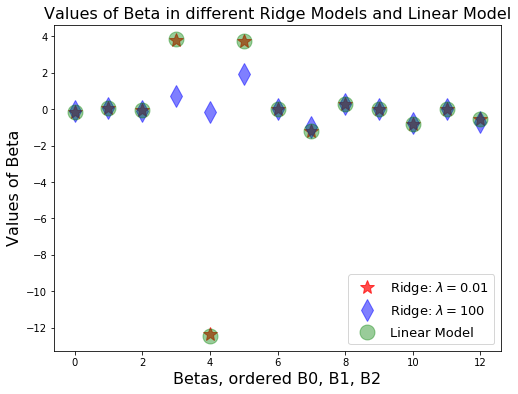

In [16]:
plt.figure(figsize=(8,6))

plt.plot(ridge_model.coef_,
        alpha = 0.7,
        linestyle="none", 
        marker = "*",
        markersize = 15,
        color = "red", 
        label = r"Ridge: $\lambda = 0.01$")

plt.plot(ridge_model2.coef_, 
        alpha = 0.5, 
        linestyle="none",
        marker="d",
        markersize=15,
        color="blue",
        label = r"Ridge: $\lambda = 100$")

plt.plot(linear_regression.coef_,
        alpha=0.4,
        linestyle="none",
        marker = "o",
        markersize= 15,
        color = "green",
        label = "Linear Model")

plt.xlabel("Betas, ordered B0, B1, B2", fontsize = 16)
plt.ylabel("Values of Beta", fontsize=16)
plt.legend(fontsize = 13, loc=4)
plt.title("Values of Beta in different Ridge Models and Linear Model", fontsize=16)
plt.show()

**Lasso Regularization**

In [17]:
lasso = Lasso(alpha = 0.01)
lasso.fit(X2_train, y_train)
lasso_train_r2 = lasso.score(X2_train, y_train)
lasso_test_r2 = lasso.score(X2_test, y_test)
print("Lasso training R2 value", lasso_train_r2)
print("Lasso test R2 value", lasso_test_r2)

Lasso training R2 value 0.7414845253242521
Lasso test R2 value 0.7096270988778383


In [18]:
lasso2 = Lasso(alpha = 1)
lasso2.fit(X2_train, y_train)
lasso2_train_r2 = lasso2.score(X2_train, y_train)
lasso2_test_r2 = lasso2.score(X2_test, y_test)
print("Lasso training R2 value", lasso2_train_r2)
print("Lasso test R2 value", lasso2_test_r2)

Lasso training R2 value 0.6832133784853487
Lasso test R2 value 0.6364462662362061


In [19]:
lasso3 = Lasso(alpha = 100)
lasso3.fit(X2_train, y_train)
lasso3_train_r2 = lasso3.score(X2_train, y_train)
lasso3_test_r2 = lasso3.score(X2_test, y_test)
print("Lasso training R2 value", lasso3_train_r2)
print("Lasso test R2 value", lasso3_test_r2)

Lasso training R2 value 0.22175771924133436
Lasso test R2 value 0.24781706709707008


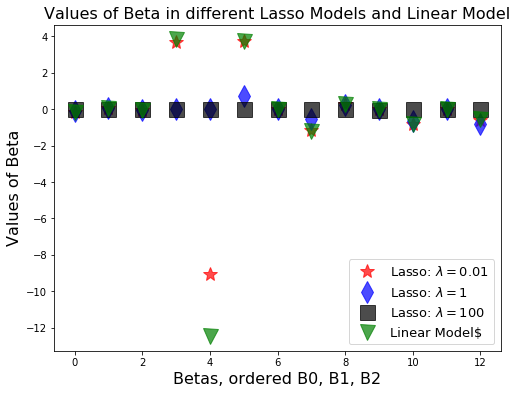

In [20]:
#plots
plt.figure(figsize=(8,6))

plt.plot(lasso.coef_,
        alpha=0.7,
        linestyle="none",
        marker="*",
        markersize = 15,
        color ="red",
        label = r'Lasso: $\lambda = 0.01$')

plt.plot(lasso2.coef_,
        alpha=0.7,
        linestyle="none",
        marker="d",
        markersize = 15,
        color ="blue",
        label = r'Lasso: $\lambda = 1$')

plt.plot(lasso3.coef_,
        alpha=0.7,
        linestyle="none",
        marker="s",
        markersize = 15,
        color ="black",
        label = r'Lasso: $\lambda = 100$')

plt.plot(linear_regression.coef_,
        alpha=0.7,
        linestyle="none",
        marker="v",
        markersize = 15,
        color ="green",
        label = r'Linear Model$')

plt.xlabel("Betas, ordered B0, B1, B2", fontsize = 16)
plt.ylabel("Values of Beta", fontsize=16)
plt.legend(fontsize = 13, loc=4)
plt.title("Values of Beta in different Lasso Models and Linear Model", fontsize=16)
plt.show()

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.6s finished
/Users/cereniyim/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


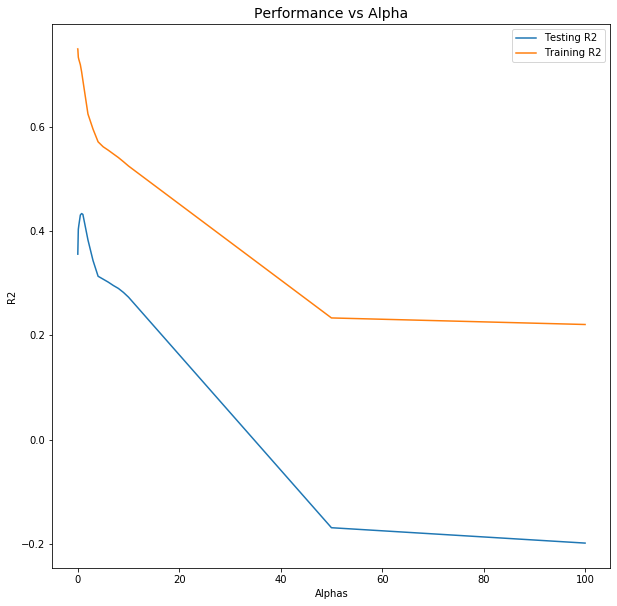

In [21]:
# Create a range of trees to evaluate
alphas_grid = {'alpha': [0.001, 0.002, 0.1, 0.2, 0.5, 0.75, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 100]}

# define all parameters except n_estimators
lasso_search_model = Lasso()

# Grid Search Object using the trees range, the model and 5-fold cross validation
grid_search = GridSearchCV(estimator = lasso_search_model, param_grid=alphas_grid, 
                           cv = 5, scoring = 'r2', verbose = 1,
                           n_jobs = -1, return_train_score = True)

# fit the dataset to grid search object
grid_search.fit(X2, y)

# Get the results into a dataframe
lasso_results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
plt.figure(figsize=(10,10))
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'], label = 'Testing R2')
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'], label = 'Training R2')

# set title, labels and legend
plt.xlabel('Alphas'); plt.ylabel('R2'); plt.legend();
plt.title('Performance vs Alpha', size=14);

In [22]:
# feature coefficiens observations
lasso_coef = sum(lasso.coef_ == 0)
lasso2_coef = sum(lasso2.coef_ == 0)
lasso3_coef = sum(lasso3.coef_ == 0)

print("Number of features eliminated when Lasso when lambda is 0.01", lasso_coef)
print("Number of features eliminated when Lasso when lambda is 0.01", lasso2_coef)
print("Number of features eliminated when Lasso when lambda is 0.01", lasso3_coef)

Number of features eliminated when Lasso when lambda is 0.01 0
Number of features eliminated when Lasso when lambda is 0.01 2
Number of features eliminated when Lasso when lambda is 0.01 11


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.5s finished
/Users/cereniyim/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


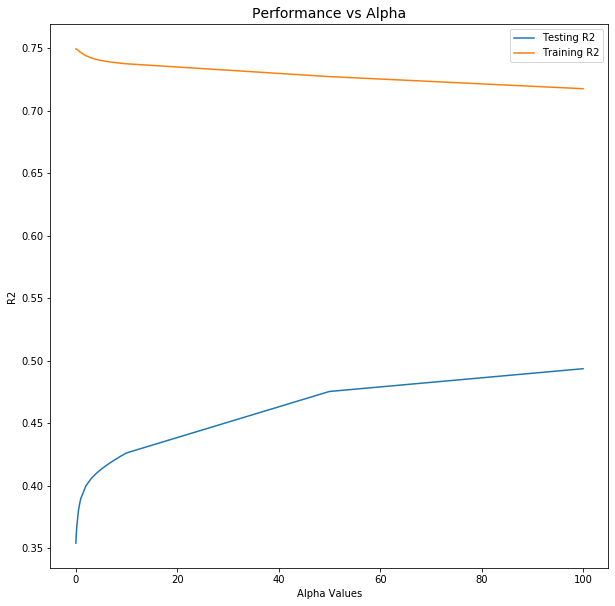

In [2]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

#verilerin yüklenmesi
boston = load_boston()
X = boston.data
y = boston.target

# 1. Grid Seacrh (Izgara Arama Algoritması)
# Arama alanının yaratılması 0.001'den 100'e kadar
alphas_grid = {'alpha': [0.001, 0.002, 0.1, 0.2, 0.5, 0.75, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 100]}

# modelin yaratılması
ridge_search_model = Ridge()

# Grid search objesinin model, alpha alanı ve 5 katlı çapraz geçerlilik kullanılarak yaratılması
# R2 metriği ile ölçümlenmesi
grid_search = GridSearchCV(estimator = ridge_search_model, param_grid=alphas_grid, 
                           cv = 5, scoring = 'r2', verbose = 1,
                           n_jobs = -1, return_train_score = True)

# grid search objesinin verilerle eğitilmesi
grid_search.fit(X, y)

# 2. Sonuçların görselleştirilmesi
# Sonuçların veri çerçevesi olarak kaydedilmesi
ridge_results = pd.DataFrame(grid_search.cv_results_)

# Eğitim ve test hatasının alpha alanı ile görselleştirilmesi
plt.figure(figsize=(10,10))
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'], label = 'Testing R2')
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'], label = 'Training R2')

# lejand, x ve y ekseninin adlandırılması, başlıklandırma
plt.xlabel('Alpha Values'); plt.ylabel('R2'); plt.legend();
plt.title('Performance vs Alpha', size=14);